In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [106]:
start='2013-01-01'
end='2023-12-31'
df=yf.download('SBIN.NS',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,240.490005,243.404999,239.755005,242.645004,213.236511,17202300
2013-01-02,245.000000,246.399994,243.815002,245.054993,215.354416,14660120
2013-01-03,246.000000,248.240005,243.619995,247.160004,217.204300,20103090
2013-01-04,246.000000,249.294998,245.065002,248.669998,218.531265,13705950
2013-01-07,249.000000,249.899994,246.175003,246.759995,216.852753,10264490


In [107]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,240.490005,243.404999,239.755005,242.645004,213.236511,17202300
1,2013-01-02,245.000000,246.399994,243.815002,245.054993,215.354416,14660120
2,2013-01-03,246.000000,248.240005,243.619995,247.160004,217.204300,20103090
3,2013-01-04,246.000000,249.294998,245.065002,248.669998,218.531265,13705950
4,2013-01-07,249.000000,249.899994,246.175003,246.759995,216.852753,10264490


In [108]:
df=df.drop(['Date','Adj Close','Volume'],axis=1)
df.head()

,Open,High,Low,Close
0,240.490005,243.404999,239.755005,242.645004
1,245.000000,246.399994,243.815002,245.054993
2,246.000000,248.240005,243.619995,247.160004
3,246.000000,249.294998,245.065002,248.669998
4,249.000000,249.899994,246.175003,246.759995


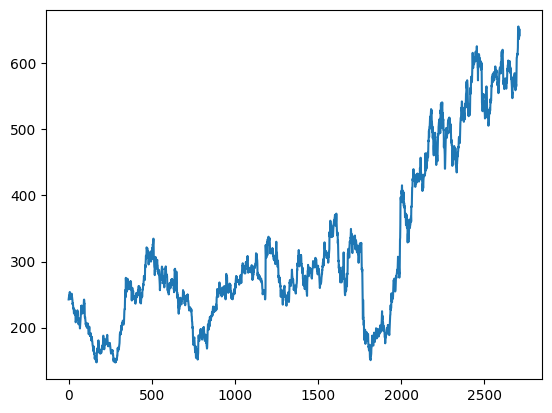

In [109]:
plt.plot(df.Close)

In [110]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2708    585.495502
2709    585.715502
2710    585.999002
2711    586.394503
2712    586.830502
Name: Close, Length: 2713, dtype: float64

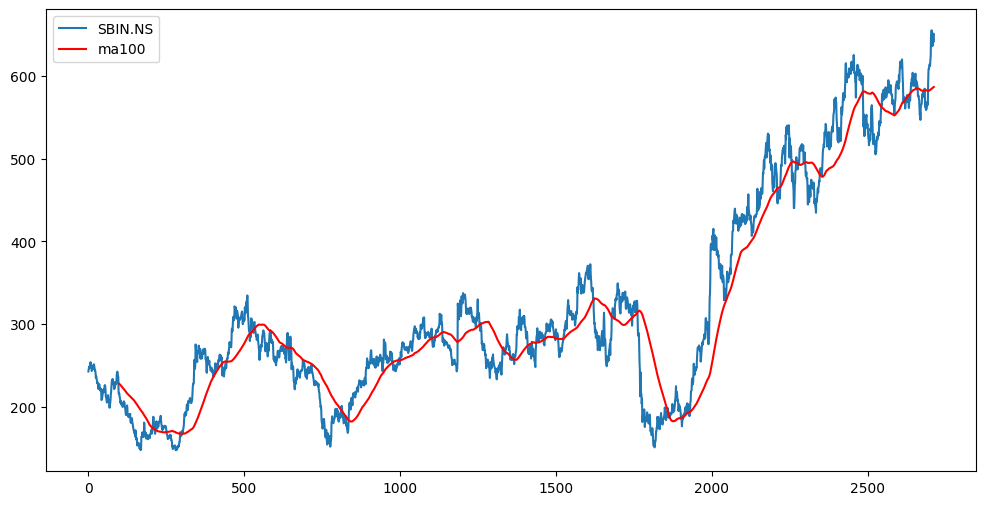

In [111]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label='Stock Price')
plt.plot(ma100,'r',label='ma100')
plt.legend()

In [112]:
df.shape

(2713, 4)

In [113]:
#splitinng data 

train_data=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
test_data=pd.DataFrame(df['Close'][int(len(df)*0.7):len(df)])
print(train_data.shape)
print(test_data.shape)

(1899, 1)
(814, 1)


In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Scaled_train_data=scaler.fit_transform(train_data)
print(Scaled_train_data)
Scaled_train_data.shape

[[0.42341364]
 [0.4341228 ]
 [0.44347674]
 ...
 [0.22724849]
 [0.2345805 ]
 [0.22591538]]


(1899, 1)

In [115]:
x_train=[]
y_train=[]
for i in range(100,Scaled_train_data.shape[0]):
    x_train.append(Scaled_train_data[i-100:i])
    y_train.append(Scaled_train_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [116]:
x_train.shape

(1799, 100, 1)

In [117]:
y_train.shape

(1799,)

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [120]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [121]:
early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=5,           
    verbose=1,             
    restore_best_weights=True  
)

In [122]:
model.fit(x_train,y_train,epochs=50,callbacks=[early_stopping])

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.1037
Epoch 2/50
 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0274

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0193
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0143
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0126
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0102
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0096
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0096
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0112
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0084
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0076
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0080
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0078
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0070
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0065
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0070
Epoch 16/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0075

In [155]:
model.save('Price Prediction.h5')

In [158]:
test_data.head()

,Close
1899,195.449997
1900,192.600006
1901,185.800003
1902,186.199997
1903,183.800003


In [131]:
past_100_days=train_data.tail(100)
final_test_data=pd.concat([past_100_days, test_data],ignore_index=True)

In [134]:
input_data=scaler.fit_transform(final_test_data)
input_data.shape

(914, 1)

In [136]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [138]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(814, 100, 1)
(814,)


In [139]:
y_pred=model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [140]:
y_pred.shape

(814, 1)

In [156]:
# y_test

In [157]:
# y_pred

In [144]:
scaler.scale_

array([0.00198196])

In [145]:
scale_factor=1/0.00198196
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

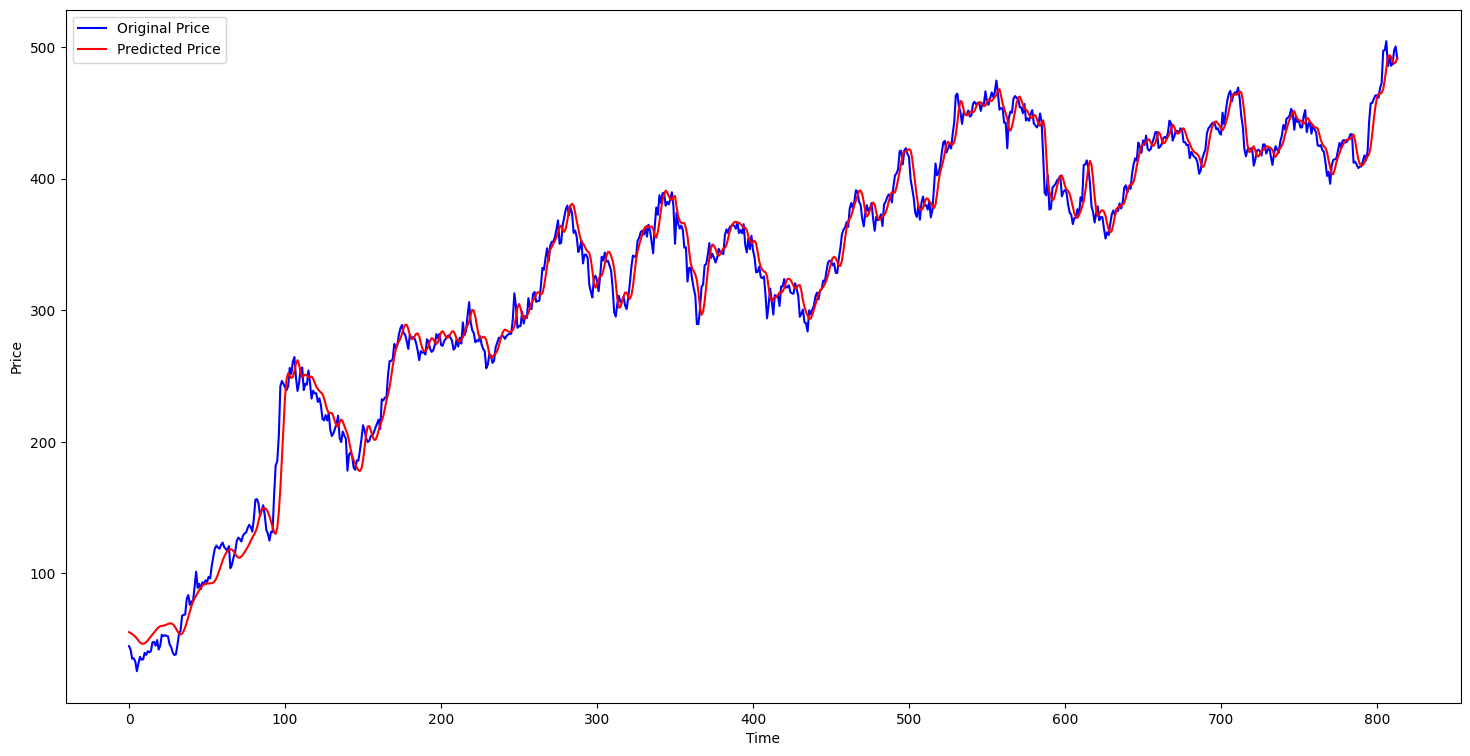

In [154]:
plt.figure(figsize=(18,9))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()